In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv')                   

In [132]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\n prices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
 prices df shape: (7914, 1241)


In [133]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [134]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [135]:
prices.columns

Index(['905270', '921795', '904261', '905261', '916328', '923024', '936365',
       '902355', '912215', '929813',
       ...
       '9889RL', '69568X', '543755', '77463M', '29235J', '131745', '69487D',
       '68157P', '9110RA', '292703'],
      dtype='object', length=1241)

In [136]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
#Data frame to hold returns
daily_r = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_r.columns:
    daily_r[col] = daily_r[col].pct_change()*100

In [138]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
daily_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
#Resample to weekly
weekly_r = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_r.columns:
    weekly_r[col] = weekly_r[col].pct_change()*100

In [141]:
weekly_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
# Running linear regression on a sample stock
import datetime as dt

weekly_no_index = weekly_r.reset_index()
weekly_no_index["date"] = weekly_no_index.date.map(dt.datetime.toordinal)

weekly_no_index[["date", "936365"]]

,date,936365
0,726474,NaN
1,726481,-3.622047
2,726488,-0.980392
3,726495,-0.990099
4,726502,-3.666667
...,...,...
1634,737912,4.051410
1635,737919,-6.778209
1636,737926,-4.225280
1637,737933,1.442128


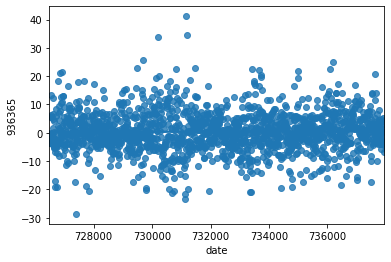

In [143]:
sns.regplot(data=weekly_no_index, x="date", y="936365")

In [144]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_df = weekly_no_index[~weekly_no_index["936365"].isna()]
model.fit(X=new_df[["date"]], y=new_df["936365"])

LinearRegression()

In [145]:
print("Line formula for 936365: \nreturn = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * date")

Line formula for 936365: 
return = -21.846821045157913 + 3.0427665472240984e-05 * date


In [146]:
model.predict(pd.DataFrame([[737947]]))[0]

0.6071834070859055

In [147]:
predictions = {}

def linear_predict(stock):
    new_df = weekly_no_index[["date", stock]]
    new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_df = new_df[~new_df[stock].isna()]
    if new_df.shape[0] != 0:
        model.fit(X=new_df[["date"]], y=new_df[stock])
        print("Line formula for " + stock + ": \n\treturn = " + str(model.intercept_) + " + " +
              str(model.coef_[0]) + " * date")
        predictions[stock] = model.predict(pd.DataFrame([[737969]]))[0]

In [148]:
adjusted = weekly_r.drop(columns="921456")

In [149]:
for stock in weekly_r.columns:
    linear_predict(stock)

Line formula for 905270: 
	return = 17.714875027801316 + -2.4100983647867704e-05 * date
Line formula for 921795: 
	return = -12.022903526256794 + 1.6784517319822153e-05 * date
Line formula for 904261: 
	return = 2.3028072699779445 + -3.1169155705158186e-06 * date
Line formula for 905261: 
	return = 7.0699202464931705 + -9.638437821378617e-06 * date
Line formula for 916328: 
	return = 1.8237969622087267 + -2.160673182118806e-06 * date
Line formula for 923024: 
	return = 22.47677799840412 + -3.0570282294724245e-05 * date
Line formula for 936365: 
	return = -21.846821045157913 + 3.0427665472240984e-05 * date
Line formula for 902355: 
	return = 18.80225313590804 + -2.5565147042845995e-05 * date
Line formula for 912215: 
	return = 7.471513125717624 + -1.0153636010905511e-05 * date
Line formula for 929813: 
	return = 19.687820696343824 + -2.6774130062682888e-05 * date
Line formula for 905271: 
	return = -1.194664876694092 + 1.963034096719461e-06 * date
Line formula for 921246: 
	return = 18.

Line formula for 904282: 
	return = 22.498563214337803 + -3.0482826316077968e-05 * date
Line formula for 906148: 
	return = 20.38749551527862 + -2.754663003153654e-05 * date
Line formula for 902198: 
	return = 9.499325057352504 + -1.287999744055982e-05 * date
Line formula for 981550: 
	return = 4.5088275654877155 + -5.7776294310665676e-06 * date
Line formula for 916944: 
	return = -6.152559532110733 + 8.397440126724228e-06 * date
Line formula for 998326: 
	return = 39.708236790004875 + -5.3883813216355006e-05 * date
Line formula for 916091: 
	return = 9.886721911287216 + -1.3172177164883592e-05 * date
Line formula for 929814: 
	return = 7.41398229216936 + -9.937377389290806e-06 * date
Line formula for 749321: 
	return = 30.54512370572796 + -4.1569854978843916e-05 * date
Line formula for 902288: 
	return = -1.9997707860746181 + 2.845696554324181e-06 * date
Line formula for 905140: 
	return = 6.420465242542998 + -8.591608491918524e-06 * date
Line formula for 902289: 
	return = 3.72977996

	return = 7.328477120202476 + -9.769405508671422e-06 * date
Line formula for 905609: 
	return = -62.56328531788905 + 8.588084930896109e-05 * date
Line formula for 912719: 
	return = -34.165764456964496 + 4.6535054564047685e-05 * date
Line formula for 921969: 
	return = 18.0371014021779 + -2.4521698119241176e-05 * date
Line formula for 916107: 
	return = 3.066658560729623 + -4.083541978854664e-06 * date
Line formula for 921460: 
	return = -18.93126414601446 + 2.564410244061292e-05 * date
Line formula for 905409: 
	return = -10.302385619897878 + 1.4447752933843627e-05 * date
Line formula for 944195: 
	return = 235.87770091563587 + -0.00032369111792654556 * date
Line formula for 912030: 
	return = 5.378180638083723 + -7.022724486025534e-06 * date
Line formula for 902262: 
	return = 6.954907773962729 + -9.36823668697876e-06 * date
Line formula for 921049: 
	return = 9.808259200043537 + -1.3114021975235032e-05 * date
Line formula for 905129: 
	return = 15.076283183387794 + -2.05029931851319

	return = -10.713993338523434 + 1.4652335983135004e-05 * date
Line formula for 902247: 
	return = 22.845480895429432 + -3.1064947531589214e-05 * date
Line formula for 541917: 
	return = 29.498871299112842 + -4.0136431216743326e-05 * date
Line formula for 904878: 
	return = 3.1797353336763665 + -4.02667494634637e-06 * date
Line formula for 741924: 
	return = -22.903267161654583 + 3.162287357810885e-05 * date
Line formula for 905354: 
	return = 21.528094908660535 + -2.929307113327351e-05 * date
Line formula for 902239: 
	return = 29.911980811456903 + -4.0703535343441574e-05 * date
Line formula for 905519: 
	return = 16.375761143137915 + -2.230287116457087e-05 * date
Line formula for 904464: 
	return = 6.727088710212363 + -9.079937885266641e-06 * date
Line formula for 993249: 
	return = 8.834019894000772 + -1.1558660417467914e-05 * date
Line formula for 516649: 
	return = -17.51011320967066 + 2.4107343825576227e-05 * date
Line formula for 912376: 
	return = 28.65110559340535 + -3.89714968

Line formula for 912090: 
	return = 26.624098053454674 + -3.6167519820762126e-05 * date
Line formula for 912632: 
	return = 44.218091434757916 + -6.004979105288314e-05 * date
Line formula for 916111: 
	return = 16.85915013935126 + -2.293282866445798e-05 * date
Line formula for 518436: 
	return = 15.000741528515638 + -2.039767878744816e-05 * date
Line formula for 904857: 
	return = 23.740374966184117 + -3.226642099547353e-05 * date
Line formula for 905761: 
	return = 4.6930796354209905 + -6.387305624923603e-06 * date
Line formula for 916741: 
	return = -6.112083443488791 + 8.665511530177036e-06 * date
Line formula for 906998: 
	return = 36.22716788013354 + -4.9278473207620005e-05 * date
Line formula for 912311: 
	return = 18.44664703774118 + -2.5094560357593518e-05 * date
Line formula for 905361: 
	return = -16.719935266959276 + 2.3272453972748465e-05 * date
Line formula for 923513: 
	return = -14.676281531399198 + 1.9898901644958943e-05 * date
Line formula for 921693: 
	return = -39.74

Line formula for 922780: 
	return = -2.8532685633367763 + 3.885986837069346e-06 * date
Line formula for 544682: 
	return = -6.0772967600409045 + 8.446659213434403e-06 * date
Line formula for 544683: 
	return = -10.425277506916926 + 1.4467492572156795e-05 * date
Line formula for 902332: 
	return = 8.237036889340665 + -1.1210445390190308e-05 * date
Line formula for 921279: 
	return = 19.050311891299184 + -2.5942500868881435e-05 * date
Line formula for 729152: 
	return = 39.34434744676089 + -5.353272445111066e-05 * date
Line formula for 938692: 
	return = 51.368849553803294 + -6.961893370398087e-05 * date
Line formula for 777771: 
	return = -15.170210241266505 + 2.1341172055937644e-05 * date
Line formula for 541863: 
	return = 14.381378656688208 + -1.9237193812926688e-05 * date
Line formula for 544345: 
	return = 63.215700998084465 + -8.597075087298673e-05 * date
Line formula for 541990: 
	return = 26.28774982236239 + -3.578560820514738e-05 * date
Line formula for 326105: 
	return = 22.29

	return = 45.682234933481205 + -6.177846911602253e-05 * date
Line formula for 916036: 
	return = 65.83879368118484 + -8.969120877915159e-05 * date
Line formula for 906194: 
	return = -3.3615740252925885 + 4.995970296344282e-06 * date
Line formula for 741076: 
	return = 9.183904473993158 + -1.2258940722028704e-05 * date
Line formula for 921983: 
	return = 22.47561945425468 + -3.0421830541101878e-05 * date
Line formula for 894604: 
	return = 57.00693629071394 + -7.753086447108194e-05 * date
Line formula for 912367: 
	return = 62.858098964481854 + -8.550857977344655e-05 * date
Line formula for 545615: 
	return = 18.31468524855195 + -2.462001587245385e-05 * date
Line formula for 702406: 
	return = 49.09648013648466 + -6.69409273030058e-05 * date
Line formula for 951068: 
	return = 4.090127703870132 + -5.365428874949349e-06 * date
Line formula for 515709: 
	return = -40.25238886265467 + 5.463981298338613e-05 * date
Line formula for 981524: 
	return = 32.576563173404075 + -4.432356253113415e

Line formula for 325308: 
	return = 18.70204013872811 + -2.529868946137963e-05 * date
Line formula for 906487: 
	return = 16.245738995969496 + -2.1879373282742134e-05 * date
Line formula for 902607: 
	return = 11.63244261680655 + -1.5673941887853313e-05 * date
Line formula for 729104: 
	return = 17.678046288630444 + -2.3652226134496362e-05 * date
Line formula for 277343: 
	return = 32.63691599932657 + -4.429758207512859e-05 * date
Line formula for 131364: 
	return = 57.266969278182096 + -7.794470767541108e-05 * date
Line formula for 912744: 
	return = 2.725054718841878 + -3.1724829786545815e-06 * date
Line formula for 543542: 
	return = 41.96109295526055 + -5.673390092673358e-05 * date
Line formula for 867705: 
	return = 97.76900790768403 + -0.00013264355781458822 * date
Line formula for 929635: 
	return = 30.158457542849803 + -4.093710150458516e-05 * date
Line formula for 951940: 
	return = 29.22783346860113 + -3.975077118790334e-05 * date
Line formula for 322668: 
	return = 55.585548

	return = 6.248279979893885 + -7.501183793531417e-06 * date
Line formula for 329534: 
	return = 6.241337037849823 + -8.300063093213493e-06 * date
Line formula for 729431: 
	return = 48.63113075971265 + -6.605660411879399e-05 * date
Line formula for 544882: 
	return = 63.63788428729815 + -8.655507375316052e-05 * date
Line formula for 328314: 
	return = 16.3560799529472 + -2.1970861009695393e-05 * date
Line formula for 541806: 
	return = 26.082745466860906 + -3.5455901054886796e-05 * date
Line formula for 867390: 
	return = 48.63865910688 + -6.57572661429559e-05 * date
Line formula for 951063: 
	return = 30.76184966240969 + -4.1874236175482206e-05 * date
Line formula for 946533: 
	return = 67.01493243429502 + -9.115081442711924e-05 * date
Line formula for 151860: 
	return = 47.63295491008499 + -6.46990395398768e-05 * date
Line formula for 149387: 
	return = 151.24249187802343 + -0.00020587780991524306 * date
Line formula for 543697: 
	return = 36.567990026920505 + -4.962460791419004e-05 

Line formula for 41195M: 
	return = -9.303544037726626 + 1.2787949494784507e-05 * date
Line formula for 28513N: 
	return = 31.378665338024994 + -4.209519728048474e-05 * date
Line formula for 755790: 
	return = 32.77788224853267 + -4.404530013555759e-05 * date
Line formula for 683199: 
	return = 160.7066795414368 + -0.00021814971945937527 * date
Line formula for 14015T: 
	return = -13.958456945535374 + 1.9383147673558153e-05 * date
Line formula for 13906D: 
	return = 129.4036532733984 + -0.00017629393974188782 * date
Line formula for 28226P: 
	return = 32.438650999272085 + -4.3853840586482034e-05 * date
Line formula for 321354: 
	return = 16.371339356077275 + -2.1569264896966165e-05 * date
Line formula for 904414: 
	return = 11.05215970184132 + -1.4806944026682623e-05 * date
Line formula for 905253: 
	return = -12.763543820768318 + 1.7839191577194006e-05 * date
Line formula for 130502: 
	return = 9.285978605802525 + -1.239749563097954e-05 * date
Line formula for 992520: 
	return = 108.6

Line formula for 906785: 
	return = 13.447284309653892 + -1.7806005417134845e-05 * date
Line formula for 756210: 
	return = 27.636785706486453 + -3.7310678164224674e-05 * date
Line formula for 67751X: 
	return = 101.49505604288879 + -0.00013765459096941318 * date
Line formula for 36218Q: 
	return = 131.3445354980491 + -0.000178124604528026 * date
Line formula for 696306: 
	return = -37.96087954156684 + 5.2332685615601374e-05 * date
Line formula for 912420: 
	return = -23.888732173190515 + 3.305211335326204e-05 * date
Line formula for 54121H: 
	return = 139.7950560043722 + -0.00018973003346838026 * date
Line formula for 546965: 
	return = 25.028781393590062 + -3.359672218765985e-05 * date
Line formula for 702365: 
	return = 4.114545625694867 + -5.017018308065763e-06 * date
Line formula for 31676F: 
	return = -88.93486547897645 + 0.00012119675277135669 * date
Line formula for 51683M: 
	return = -6.828269443047654 + 9.87785266793525e-06 * date
Line formula for 28179N: 
	return = 40.859863

Line formula for 14806F: 
	return = 25.519980067114496 + -3.431731505191949e-05 * date
Line formula for 54060C: 
	return = -44.01967069239339 + 6.035611900398709e-05 * date
Line formula for 96699P: 
	return = -357.43067756272006 + 0.00048521057867089226 * date
Line formula for 9801CJ: 
	return = -125.53319817618141 + 0.000170201651083423 * date
Line formula for 9801CK: 
	return = -281.5701873314868 + 0.0003830856082240309 * date
Line formula for 95313K: 
	return = -126.16280145079872 + 0.00017115618588781173 * date
Line formula for 9595FU: 
	return = 205.4411666125742 + -0.00027863742418773434 * date
Line formula for 312367: 
	return = 3.3088366051379876 + -3.886455125518553e-06 * date
Line formula for 740800: 
	return = 19.02379831169375 + -2.566507167746382e-05 * date
Line formula for 32730D: 
	return = -4.1593340220578225 + 6.132010624176639e-06 * date
Line formula for 89257J: 
	return = -254.76284833168717 + 0.0003461514123582881 * date
Line formula for 29739V: 
	return = -18.29780

	return = -1612.0104322853203 + 0.0021862524145723965 * date
Line formula for 28484K: 
	return = -88.19309303540808 + 0.00012064461477609308 * date
Line formula for 541798: 
	return = -1.9635794214468993 + 3.103154481975039e-06 * date
Line formula for 324981: 
	return = 28.31415271697136 + -3.7935259906621814e-05 * date
Line formula for 89261N: 
	return = 44.61846586560021 + -5.979100346514377e-05 * date
Line formula for 29502P: 
	return = 30.55840106068108 + -4.125108503147168e-05 * date
Line formula for 87161Q: 
	return = 22.726933172247584 + -2.9879570984189224e-05 * date
Line formula for 906828: 
	return = -5.533657537336208 + 7.902733322342405e-06 * date
Line formula for 545918: 
	return = -40.73564565480521 + 5.620864218391836e-05 * date
Line formula for 545588: 
	return = -10.284948500077983 + 1.4601380780291995e-05 * date
Line formula for 32521X: 
	return = -54.00069491823098 + 7.404063463114916e-05 * date
Line formula for 325895: 
	return = 29.537433786881703 + -3.979384281801

In [162]:
# Ordered list of stocks and their predicted returns
sorted_values = sorted(predictions.values(), reverse=True)

sorted_dict = {}
for i in sorted_values:
    for k in predictions.keys():
        if predictions[k] == i:
            sorted_dict[k] = predictions[k]
            break

count = 1
for stock in sorted_dict:
    print(str(count) + ". " + stock + ": " + str(sorted_dict[stock]))
    count += 1

1. 311239: 135.67331347164873
2. 906175: 10.897603762578115
3. 77463M: 3.0527725898091376
4. 15168M: 2.473489697285231
5. 9434UH: 2.361854999513639
6. 9110RA: 1.6243070434935873
7. 69568X: 1.5944002786995952
8. 2605LP: 1.554214539173472
9. 9660J1: 1.5364066832735261
10. 9436NF: 1.3991023304372447
11. 9448Z6: 1.3760758442565475
12. 9113PQ: 1.2560972450362442
13. 9406MC: 1.1357422114494966
14. 9801CK: 1.1351158839930235
15. 9406MA: 1.0880348295534077
16. 68157P: 1.0422022201434231
17. 30241D: 1.0328113467536326
18. 91240W: 1.0045799046224602
19. 13466Q: 0.9891612420323668
20. 921456: 0.935684609198276
21. 7025QJ: 0.8941602893545451
22. 50901M: 0.8443145653066324
23. 28484K: 0.8388926862905492
24. 50394K: 0.8262096760937254
25. 67888X: 0.8147710834676616
26. 905609: 0.8141191657956597
27. 9110QF: 0.8014106168086244
28. 8866F3: 0.7779503111995041
29. 871997: 0.776563074535801
30. 992816: 0.7462058105913414
31. 545918: 0.7445898090188408
32. 15303X: 0.740651986999616
33. 89257H: 0.737789840